In [1]:
import os.path as osp
import numpy as np
import numpy.linalg as npla
import scipy.spatial.transform as sptf
np.set_printoptions(6, suppress=True)
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib widget
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times"],
    'font.size': 14,
})

import utils


def load_dicp_pred_poses(filename):
    data = np.loadtxt(filename, delimiter=' ')

    poses = []
    for tq in data[:, 1:]:
        T_mr = np.eye(4)
        T_mr[:3, :3] = sptf.Rotation.from_quat(tq[3:]).as_matrix()
        T_mr[:3, 3] = tq[:3]
        poses.append(T_mr)
    return np.array(poses)


def load_steam_pred_poses(filename):
    data = np.loadtxt(filename)
    poses = []
    for v in data:
        T_ms = np.eye(4)
        T_ms[:3, :] = v.reshape(3, 4)
        poses.append(T_ms)

    return np.array(poses)


def load_gt_poses(filename):
    data = np.loadtxt(filename, delimiter=' ')

    poses = []
    for tq in data[:, 1:]:
        T_mr = np.eye(4)
        T_mr[:3, :3] = sptf.Rotation.from_quat(tq[3:]).as_matrix()
        T_mr[:3, 3] = tq[:3]
        poses.append(T_mr)
    return np.array(poses)


def plot_steam_pred_poses(ax, pred_poses, gt_poses, label):
    T_gt_pred = gt_poses[0] @ npla.inv(pred_poses[0])
    pred_poses = T_gt_pred @ pred_poses
    ax.plot(pred_poses[:, 0, 3], pred_poses[:, 1, 3], label=label)


def plot_dicp_pred_poses(ax, filename, gt_poses, label):
    pred_poses = load_dicp_pred_poses(filename)
    T_gt_pred = gt_poses[0] @ npla.inv(pred_poses[0])
    pred_poses = T_gt_pred @ pred_poses
    ax.plot(pred_poses[:, 0, 3], pred_poses[:, 1, 3], label=label)


gt_path = '/media/yuchen/T7/ASRL/data/dicp'
pred_path = '/home/yuchen/ASRL/temp/doppler_odometry/dicp'
sequences = [
    'brisbane-lagoon-freeway',
    'bunker-road',
    'bunker-road-vehicles',
    'robin-williams-tunnel',
    'san-francisco-city',
]

In [6]:
### compute kitti metric
sequence = sequences[0]

print(f"                    KITTI metric:     t(2d)  r(2d)    t      r          RPE:     t(2d)    r(2d)      t      r")
for sequence in sequences:
  print(f"{sequence}:")
  gt_poses = load_gt_poses(osp.join(gt_path, sequence, 'ref_poses.txt'))[50:]

  ##
  pred_file = 'elastic_0808_1'
  pred_poses = load_steam_pred_poses(osp.join(pred_path, pred_file, sequence+'_poses.txt'))[50:]
  # kitti metric
  t_err_2d, r_err_2d, t_err, r_err = utils.evaluate_odometry_kitti(gt_poses, pred_poses)
  print(f"{pred_file:<35} & {t_err_2d:.2f} & {r_err_2d:.4f} & {t_err:.2f} & {r_err:.4f}", end = '')
  # rpe metric
  t_err_2d, r_err_2d, t_err, r_err = utils.evaluate_odometry_rpe(gt_poses, pred_poses)
  print(f"            & {t_err_2d:.4f} & {r_err_2d:.4f} & {t_err:.4f} & {r_err:.4f} \\\\")

  ##
  pred_file = 'steam_0808_1'
  pred_poses = load_steam_pred_poses(osp.join(pred_path, pred_file, sequence+'_poses.txt'))[50:]
  # kitti metric
  t_err_2d, r_err_2d, t_err, r_err = utils.evaluate_odometry_kitti(gt_poses, pred_poses)
  print(f"{pred_file:<35} & {t_err_2d:.2f} & {r_err_2d:.4f} & {t_err:.2f} & {r_err:.4f}", end = '')
  # rpe metric
  t_err_2d, r_err_2d, t_err, r_err = utils.evaluate_odometry_rpe(gt_poses, pred_poses)
  print(f"            & {t_err_2d:.4f} & {r_err_2d:.4f} & {t_err:.4f} & {r_err:.4f} \\\\")

  ##
  pred_file = 'steam_rv_0808_1'
  pred_poses = load_steam_pred_poses(osp.join(pred_path, pred_file, sequence+'_poses.txt'))[50:]
  # kitti metric
  t_err_2d, r_err_2d, t_err, r_err = utils.evaluate_odometry_kitti(gt_poses, pred_poses)
  print(f"{pred_file:<35} & {t_err_2d:.2f} & {r_err_2d:.4f} & {t_err:.2f} & {r_err:.4f}", end = '')
  # rpe metric
  t_err_2d, r_err_2d, t_err, r_err = utils.evaluate_odometry_rpe(gt_poses, pred_poses)
  print(f"            & {t_err_2d:.4f} & {r_err_2d:.4f} & {t_err:.4f} & {r_err:.4f} \\\\")

                    KITTI metric:     t(2d)  r(2d)    t      r          RPE:     t(2d)    r(2d)      t      r
brisbane-lagoon-freeway:
elastic_0808_1                      & 1.10 & 0.0014 & 1.54 & 0.0039            & 0.0781 & 0.0269 & 0.0800 & 0.1162 \\
steam_0808_1                        & 1.89 & 0.0017 & 2.30 & 0.0042            & 0.3121 & 0.0251 & 0.3123 & 0.1020 \\
steam_rv_0808_1                     & 1.29 & 0.0015 & 1.69 & 0.0039            & 0.0876 & 0.0204 & 0.0882 & 0.0986 \\
bunker-road:
elastic_0808_1                      & 1.98 & 0.0013 & 2.85 & 0.0085            & 0.0387 & 0.0264 & 0.0399 & 0.1916 \\
steam_0808_1                        & 1.37 & 0.0011 & 2.32 & 0.0077            & 0.0246 & 0.0174 & 0.0252 & 0.1028 \\
steam_rv_0808_1                     & 1.42 & 0.0011 & 2.36 & 0.0077            & 0.0154 & 0.0176 & 0.0163 & 0.1039 \\
bunker-road-vehicles:
elastic_0808_1                      & 10.80 & 0.0042 & 12.09 & 0.0149            & 0.3719 & 0.0318 & 0.3723 & 0.2833 \\
st

In [ ]:
fig, ax = plt.subplots(1, len(sequences), figsize=(6 * len(sequences), 6))

for i, sequence in enumerate(sequences):
  error_file = 'elastic_0808_1'
  error = np.loadtxt(osp.join(pred_path, error_file, sequence+'_eval.txt'))
  ax[i].plot(error, label=error_file)

  error_file = 'steam_0808_1'
  error = np.loadtxt(osp.join(pred_path, error_file, sequence+'_eval.txt'))
  ax[i].plot(error, label=error_file)

  error_file = 'steam_rv_0808_1'
  error = np.loadtxt(osp.join(pred_path, error_file, sequence+'_eval.txt'))
  ax[i].plot(error, label=error_file)

  ax[i].set_xlabel('x (m)')
  ax[i].set_ylabel('y (m)')
  ax[i].set_title(sequence)
  ax[i].legend()

plt.show()

Average error: [-0.118477 -0.020387 -0.011193  0.000072 -0.000234  0.000111] Average abs error: [0.139313 0.02451  0.01269  0.00205  0.001313 0.000647]
Average error: [-0.356341 -0.017606 -0.008757  0.000125 -0.000206 -0.000097] Average abs error: [0.369155 0.022595 0.010379 0.001776 0.001117 0.000669]
Average error: [-0.018215 -0.020047 -0.010609  0.000021 -0.000217  0.000036] Average abs error: [0.029398 0.020494 0.011514 0.001745 0.001114 0.00058 ]


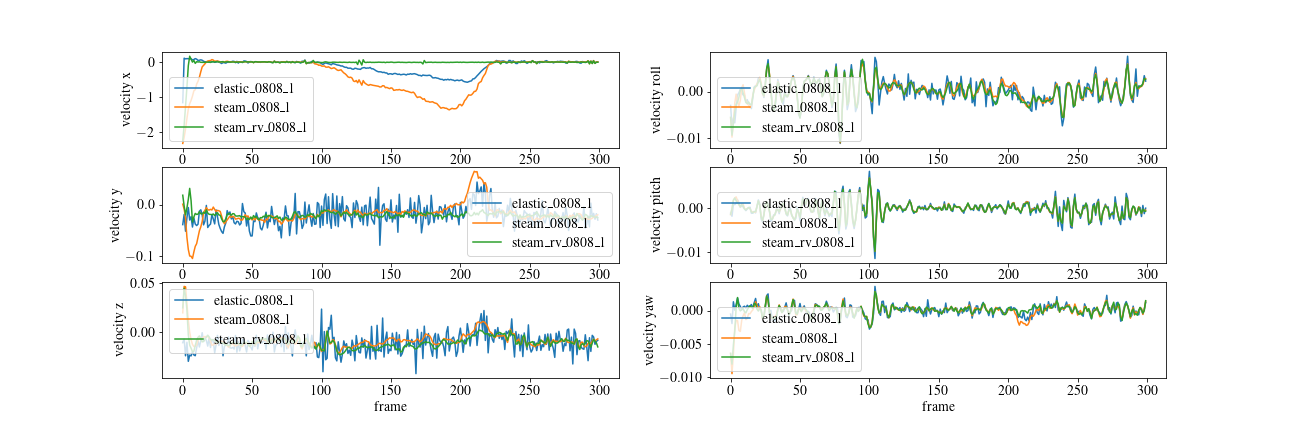

In [3]:
sequence = sequences[3]

fig, ax = plt.subplots(3, 2, figsize=(18, 6))

error_file = 'elastic_0808_1'
utils.plot_error(ax, osp.join(pred_path, error_file, sequence+'_eval.txt'), label=error_file)

error_file = 'steam_0808_1'
utils.plot_error(ax, osp.join(pred_path, error_file, sequence+'_eval.txt'), label=error_file)

error_file = 'steam_rv_0808_1'
utils.plot_error(ax, osp.join(pred_path, error_file, sequence+'_eval.txt'), label=error_file)

utils.add_legend(ax, xlabel='frame')


In [ ]:
fig, axs = plt.subplots(1, len(sequences), figsize=(len(sequences) * 5, 5))
# fig.subplots_adjust(left=0.05, right=0.95, bottom=0.2, top=0.95, wspace=0.3, hspace=0.3)

for i, sequence in enumerate(sequences):
    ax = axs[i] if len(sequences) > 1 else axs

    gt_poses = load_gt_poses(osp.join(gt_path, sequence, 'ref_poses.txt'))
    ax.plot(gt_poses[:, 0, 3], gt_poses[:, 1, 3], label='ground truth')

    pred_file = 'elastic'
    pred_poses = load_steam_pred_poses(osp.join(pred_path, pred_file, sequence+'_poses.txt'))
    plot_steam_pred_poses(ax, pred_poses, gt_poses, 'elastic')

    pred_file = 'steam_0807_1'
    pred_poses = load_steam_pred_poses(osp.join(pred_path, pred_file, sequence+'_poses.txt'))
    plot_steam_pred_poses(ax, pred_poses, gt_poses, 'steam p2p')

    pred_file = 'steam_0807_1_rv'
    pred_poses = load_steam_pred_poses(osp.join(pred_path, pred_file, sequence+'_poses.txt'))
    plot_steam_pred_poses(ax, pred_poses, gt_poses, 'steam p2p+rv')

    ax.set_xlabel('x (m)')
    ax.set_ylabel('y (m)')
    ax.set_title(sequence)
    ax.legend()

plt.show()